<h1>CS105 Final Project (Team 8)</h1>

*Group Members: Noel Kim, Solomon Lim, Jia Desai*

Features in the dataset: Year, Country, Surface Temperature Change, Disasters, Forest_and_Carbon, CO2 Levels, Mean Sea Levels

***Proposal***

Climate change is a major obstacle facing our planet today. The increasing global temperatures and rising sea levels all showcase the effects of climate change. Understanding the factors that contribute to climate change is a crucial step to develop effective solutions to this global phenomenon. Within our project, we aim to analyze the various factors that influence climate change.
The primary focus of our project is to identify and analyze the main factors that contribute to climate change. We will be focusing on factors like changes in carbon dioxide emissions, deforestation, and the usage of renewable energy. By understanding and analyzing these factors, we aim to understand their impact on climate change.

**Dataset**: (https://climatedata.imf.org/pages/climatechange-data)

**Slides Link**: (https://docs.google.com/presentation/d/1EdeM43EC74Nq1OQUFFt_oNZnq_oep_ek01FMe7Yg-e4/edit?usp=sharing)

***Contributions***

**Noel Kim**: I worked on cleaning the data, creating eda graphs, along with working on the KNN model for predicting. I also worked on the slides, video, and report.

**Solomon Lim**: I helped with data cleaning, along with working on the K-means clustering model. I worked on the slides, presentation video, and reprt.

**Jia Desai**: I conducted the linear regression analysis, along with the confusion matrix for the KNN model. I worked on the presentation slides, compiled the presentation video, and write the report in the required format.


***Techniques***


**K-Means Clustering**: Used K-Means Clustering to group countries based on either their value for annual surface temperature change, climate related disasters, or forest carbon stock. Part of unsupervised learning. 

**K-Nearest Neighbor**: Used KNN to predict the value of annual surface temperature in a specific year given the value for climate related disaster and forest carbon stock. Part of supervised learning. Also implemented Mean Squarred Error for predicted and actual values.

**Linear Regression**: Used to identify the strength of the impact of various factors on climate change. The Pearson correlation coefficient was also used to put a number to the relationship between multiple factors and aspects of climate change. Helped provide concrete proof for the important affectors of climate change. 

<h2>Data Cleaning and EDA<h2>

**Annual Surface Temperature Change dataset from 1961 to 2022**

Cleaned the data by removing all columns except country column and the years columns from 1961 to 2022.
This code prints the first 10 lines of the clean data which only shows the columns i mentioned previously.

In [1]:
import pandas as pd

data = pd.read_csv('Annual_Surface_Temperature_Change.csv')

# index to country
data.set_index('Country', inplace=True)

# 1961 to 2023
years = [f'F{year}' for year in range(1961, 2021)]
# take out countries with missing values for better results
filtered_data = data.dropna(subset=years)
# only years
filtered_data = filtered_data[years]
# reset the index for country
filtered_data.reset_index(inplace=True)

print(filtered_data.head(10))

                        Country  F1961  F1962  F1963  F1964  F1965  F1966  \
0  Afghanistan, Islamic Rep. of -0.113 -0.164  0.847 -0.764 -0.244  0.226   
1                       Albania  0.627  0.326  0.075 -0.166 -0.388  0.559   
2                       Algeria  0.164  0.114  0.077  0.250 -0.100  0.433   
3      Andorra, Principality of  0.736  0.112 -0.752  0.308 -0.490  0.415   
4                        Angola  0.041 -0.152 -0.190 -0.229 -0.196  0.175   
5                      Anguilla  0.086 -0.024  0.234  0.189 -0.365 -0.001   
6                     Argentina  0.122 -0.046  0.162 -0.343  0.090 -0.163   
7                     Australia  0.157  0.126 -0.096 -0.012  0.140 -0.230   
8                       Austria  1.031 -0.621 -0.727 -0.371 -0.883  0.602   
9                  Bahamas, The  0.073 -0.062 -0.097  0.192  0.054 -0.172   

   F1967  F1968  F1969  ...  F2011  F2012  F2013  F2014  F2015  F2016  F2017  \
0 -0.371 -0.423 -0.539  ...  1.397  0.223  1.281  0.456  1.093  1.555  1

This is a simple plot for the surface temperature change over the years 1961 to 2022 of the world which I got by using mean. This was made to show our observation of a consistent upward trend which is a common indicator of climate change as we will see in a few other plots after.

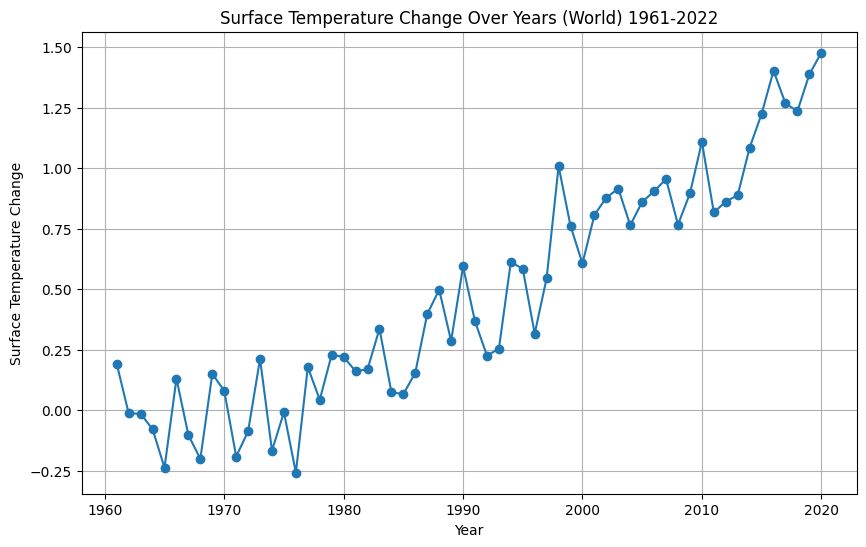

In [2]:
import matplotlib.pyplot as plt

world_data = filtered_data.iloc[:, 1:].mean(axis=0)  
years_int = range(1961, 2021)

plt.figure(figsize=(10, 6))
plt.plot(years_int, world_data, marker='o', linestyle='-')
plt.title('Surface Temperature Change Over Years (World) 1961-2022')
plt.xlabel('Year')
plt.ylabel('Surface Temperature Change')
plt.grid(True)
plt.show()

**Climate Related Disasters dataset from 1980 to 2022**

Cleaned the data by removing all columns except country column, indicator and the years columns from 1980 to 2022. The indicator column has 7 indicators: drought, extreme temperature, flood, landslide, storm, total, and wildfire.
This code prints the first 10 lines of the clean data which only shows the columns i mentioned previously.

In [3]:
df = pd.read_csv("Climate-related_Disasters_Frequency.csv")

# only columns country and indicator from year 1980 to 2022
selected_columns = ["Country", "Indicator"] + [f"F{year}" for year in range(1980, 2021)]
df_selected = df[selected_columns]

print(df_selected.head(10))

                        Country  \
0  Afghanistan, Islamic Rep. of   
1  Afghanistan, Islamic Rep. of   
2  Afghanistan, Islamic Rep. of   
3  Afghanistan, Islamic Rep. of   
4  Afghanistan, Islamic Rep. of   
5  Afghanistan, Islamic Rep. of   
6  Afghanistan, Islamic Rep. of   
7                       Albania   
8                       Albania   
9                       Albania   

                                           Indicator  F1980  F1981  F1982  \
0  Climate related disasters frequency, Number of...    NaN    NaN    NaN   
1  Climate related disasters frequency, Number of...    NaN    NaN    NaN   
2  Climate related disasters frequency, Number of...    1.0    NaN    NaN   
3  Climate related disasters frequency, Number of...    NaN    NaN    NaN   
4  Climate related disasters frequency, Number of...    NaN    NaN    NaN   
5  Climate related disasters frequency, Number of...    1.0    NaN    NaN   
6  Climate related disasters frequency, Number of...    NaN    NaN    NaN  

Cleaned the data by indicators to display the total number of disasters each year by the entire world.

In [35]:
df = pd.read_csv("Climate-related_Disasters_Frequency.csv")

# indicator column
desired_indicators = [
    "Climate related disasters frequency, Number of Disasters: Drought",
    "Climate related disasters frequency, Number of Disasters: Extreme temperature",
    "Climate related disasters frequency, Number of Disasters: Flood",
    "Climate related disasters frequency, Number of Disasters: Landslide",
    "Climate related disasters frequency, Number of Disasters: Storm",
    "Climate related disasters frequency, Number of Disasters: TOTAL",
    "Climate related disasters frequency, Number of Disasters: Wildfire"
]

# change name
indicator_names = [
    "Drought",
    "Extreme temperature",
    "Flood",
    "Landslide",
    "Storm",
    "Total",
    "Wildfire"
]

df_filtered = df[df['Indicator'].isin(desired_indicators)]
pivot_table = df_filtered.pivot_table(index='Indicator', aggfunc='sum').reset_index()

selected_columns = ["Indicator"] + [f"F{year}" for year in range(1980, 2022)]
df_selected = pivot_table[selected_columns]

df_selected.loc[:len(indicator_names)-1, 'Indicator'] = indicator_names
print(df_selected)

             Indicator  F1980  F1981  F1982  F1983  F1984  F1985  F1986  \
0              Drought   24.0   18.0    6.0   26.0    6.0    3.0    4.0   
1  Extreme temperature    3.0    1.0    2.0    2.0    1.0    7.0    2.0   
2                Flood   39.0   38.0   47.0   48.0   46.0   56.0   48.0   
3            Landslide    3.0    7.0   12.0   16.0    6.0    4.0    9.0   
4                Storm   34.0   46.0   51.0   55.0   51.0   49.0   53.0   
5                Total  104.0  112.0  120.0  157.0  117.0  130.0  121.0   
6             Wildfire    1.0    2.0    2.0   10.0    7.0   11.0    5.0   

   F1987  F1988  ...  F2012  F2013  F2014  F2015  F2016  F2017  F2018  F2019  \
0   15.0   17.0  ...   18.0    9.0   20.0   27.0   14.0   12.0   17.0   15.0   
1    5.0    5.0  ...   52.0   13.0   17.0   12.0   12.0   10.0   27.0   21.0   
2   65.0   74.0  ...  136.0  148.0  136.0  161.0  159.0  127.0  127.0  195.0   
3   14.0   15.0  ...   13.0   11.0   15.0   20.0   13.0   25.0   12.0   25.0   

C:\Users\noelk\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


This is a simple plot for the total amount of disasters with the colors representing the 6 indicators(excluding total). This data of the whole world also shows a constant upward trend similar to the one we saw for annual surface temperature change. 

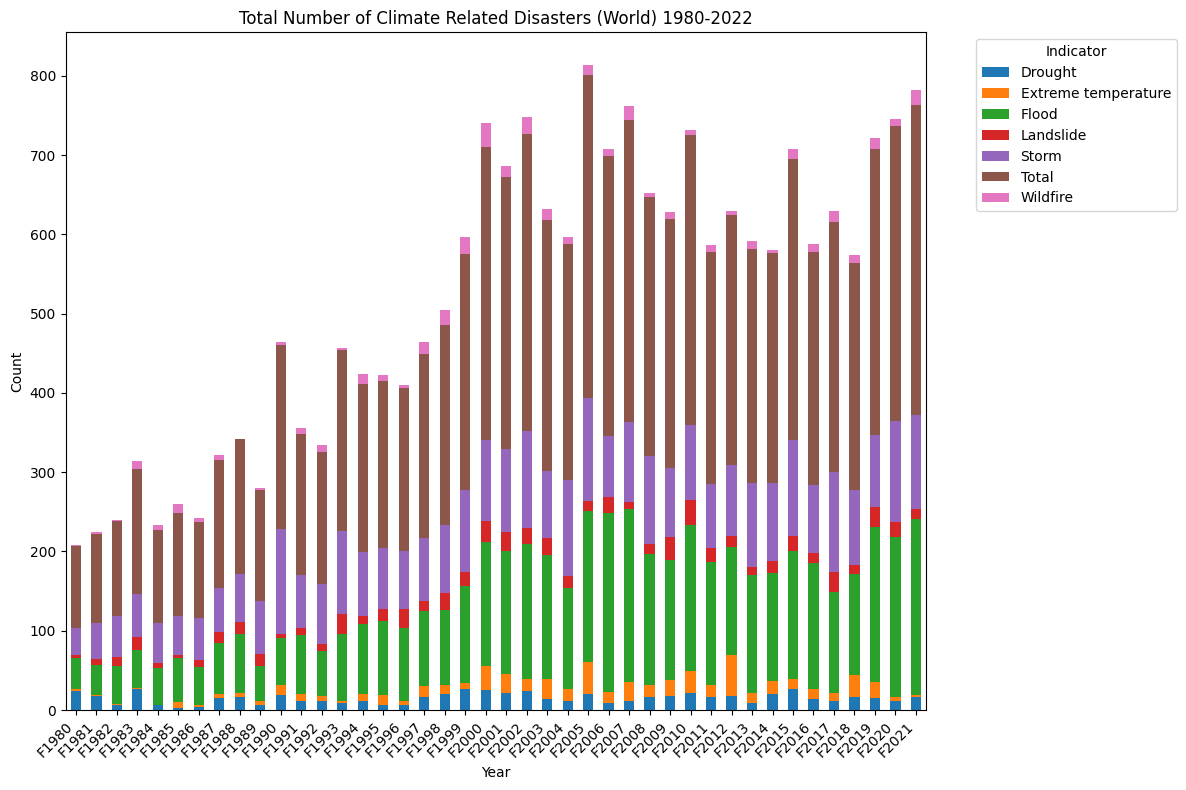

In [5]:
import matplotlib.pyplot as plt

df_filtered = df[df['Indicator'].isin(desired_indicators)]

pivot_table = df_filtered.pivot_table(index='Indicator', aggfunc='sum').reset_index()
pivot_table['Indicator'] = indicator_names
years = [f'F{year}' for year in range(1980, 2022)]
pivot_table_transposed = pivot_table[years].transpose()

plt.figure(figsize=(12, 8))
pivot_table_transposed.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total Number of Climate Related Disasters (World) 1980-2022')
plt.legend(indicator_names, title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Carbon Stocks in Forests dataset from 1992 to 2020**

Cleaned the data by removing all columns except country column, indicator: "Carbon stocks in forests", and the years columns ranging from 1992 to 2020. The indicator: "Carbon stocks in forests" is needed to get the carbon stocks value from each year 1992 to 2020.'
This code prints the first 10 lines of the clean data which only shows the columns I mentioned previously before.

In [6]:
df = pd.read_csv('Forest_and_Carbon.csv')

# Filter out rows where the Indicator is "Carbon stocks in forests"
df_filtered = df[df['Indicator'] == 'Carbon stocks in forests']

# Filter out columns for years from 1992 to 2021
years = [f'F{year}' for year in range(1992, 2021)]
df_filtered_years = df_filtered[['Country'] + years]

# Set 'Country' column as the index
df_filtered_years.set_index('Country', inplace=True)

# Drop rows with missing values for better results
filtered_data = df_filtered_years.dropna(subset=years)

# Reset the index for 'Country'
filtered_data.reset_index(inplace=True)

print(filtered_data.head(10))


                    Country        F1992        F1993        F1994  \
0        Advanced Economies   52618.6601   53177.6998   53393.5688   
1                    Africa   55811.7552   57006.7484   56766.9408   
2                   Algeria      30.8266      30.6701      30.5136   
3            American Samoa       1.1817       1.1956       1.2095   
4                  Americas  143539.8246  143225.9246  142912.0242   
5  Andorra, Principality of       1.3898       1.3898       1.3898   
6                    Angola    1364.2896    1361.6040    1358.9184   
7                  Anguilla       0.6954       0.6954       0.6954   
8       Antigua and Barbuda       1.2615       1.2532       1.2448   
9                 Argentina    3641.7913    3630.4948    3619.1983   

         F1995        F1996        F1997        F1998        F1999  \
0   53609.4382   53825.3073   54041.1769   54257.0465   54472.9153   
1   56527.1333   56287.3259   56047.5177   55807.7105   55567.9025   
2      30.3571     

This is a simple plot for the forest carbon stocks of the world which I got from the "World" from the country column which existed in the original dataset. This plot shows a consistent downward trend similar to the previous plots except for the fact that it is going downward instead of upwards. This means that the amount of carbon stored within the forest is decreasing which can be seen as a sign of climate change.

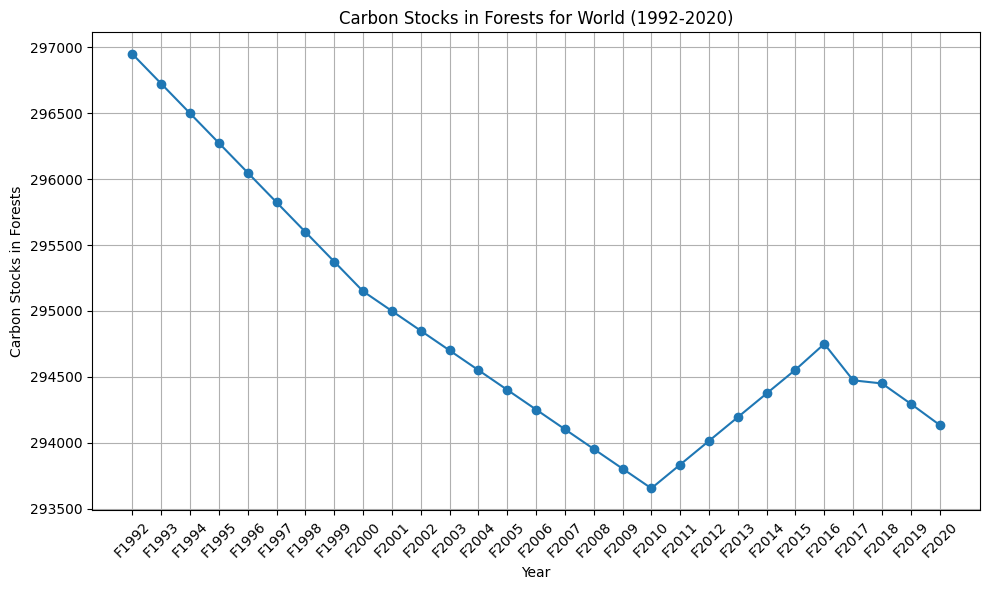

In [7]:
# Filter out rows where the Indicator is "Carbon stocks in forests" and the Country is "World"
df_world = df[(df['Indicator'] == 'Carbon stocks in forests') & (df['Country'] == 'World')]

# Filter out columns for years from 1992 to 2020
years = [f'F{year}' for year in range(1992, 2021)]
df_world_years = df_world[years]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(years, df_world_years.values.flatten(), marker='o')
plt.xlabel('Year')
plt.ylabel('Carbon Stocks in Forests')
plt.title('Carbon Stocks in Forests for World (1992-2020)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Combined Data for Annual Surface Temp, Climate Related Disasters, and Forest Carbon for selected Country from 2000 to 2020**

Using the cleaned data set for annual surface temperature change, climate related disasters, and forest carbon stocks, we combined the three datasets to create one dataset to work with. We wanted to make a dataset that outputs from years 2000 to 2020 with the values for surface temperature change, climate related disasters, and carbon stocks as separate columns of the dataset. 
The output below shows the final cleaned data set which allows you to select a country using the function get_country_data() and get the data for the selected country.

In [8]:
def get_country_data(country):
    temp_df = pd.read_csv('Annual_Surface_Temperature_Change.csv')
    disasters_df = pd.read_csv('Climate-related_Disasters_Frequency.csv')
    forestcarbon_df = pd.read_csv('Forest_and_Carbon.csv')

    # to output any country on the data set
    country_temp_df = temp_df[temp_df['Country'] == country]
    country_disasters_df = disasters_df[(disasters_df['Country'] == country) & 
                                        (disasters_df['Indicator'] == 'Climate related disasters frequency, Number of Disasters: TOTAL')]
    country_forestcarbon_df = forestcarbon_df[(forestcarbon_df['Country'] == country) & 
                                              (forestcarbon_df['Indicator'] == 'Carbon stocks in forests')]

    # annual surface temp change
    years_temp_disasters = [f'F{year}' for year in range(2000, 2023)]
    country_temp_selected_years = country_temp_df[years_temp_disasters]

    temp_data = {
        'Year': list(range(2000, 2023)),
        'S.Temp Change': country_temp_selected_years.values.flatten()
    }
    new_df = pd.DataFrame(temp_data)

    # climate related disasters
    country_disasters_selected_years = country_disasters_df[years_temp_disasters].values.flatten()

    new_df['Disasters'] = country_disasters_selected_years

    # forest carbon data
    years_forestcarbon = [f'F{year}' for year in range(2000, 2021)]
    country_forestcarbon_selected_years = country_forestcarbon_df[years_forestcarbon].values.flatten()

    new_df['Forest Carbon'] = pd.Series(country_forestcarbon_selected_years, index=new_df.index[:len(country_forestcarbon_selected_years)])

    title = f'{country}'
    print(title)
    print(new_df)
    
    # Save the DataFrame to a CSV file
    csv_filename = f'{country.lower().replace(" ", "_")}_temp_disasters_forestcarbon_2000_2022.csv'
    new_df.to_csv(csv_filename, index=False)

# use get_country_data to get data for a country in the dataset
get_country_data('United States')
get_country_data('Spain')
get_country_data('Korea, Rep. of')
get_country_data('Japan')
get_country_data('France')
get_country_data('Mexico')

United States
    Year  S.Temp Change  Disasters  Forest Carbon
0   2000          1.000       30.0     15501.5835
1   2001          0.786       26.0     15622.2178
2   2002          0.951       29.0     15742.8521
3   2003          0.990       22.0     15863.4864
4   2004          0.863       20.0     15984.1207
5   2005          1.153       16.0     16104.7550
6   2006          1.026       28.0     16225.3892
7   2007          1.143       23.0     16346.0235
8   2008          0.212       21.0     16466.6578
9   2009          0.398       17.0     16587.2921
10  2010          0.695       15.0     16707.9264
11  2011          0.537       23.0     16833.2032
12  2012          1.448       25.0     16958.4800
13  2013          0.614       28.0     17083.7569
14  2014          0.501       19.0     17209.0337
15  2015          1.531       29.0     17334.3105
16  2016          2.224       26.0     17476.9542
17  2017          1.433       24.0     17587.0622
18  2018          1.276       19.0  

This is a plot for the just the annual surface temperature change of the country "United States". You can make a plot for any country using the function plot_temp_change(). This is to show the line graph for annual surface temperature change for each country. 

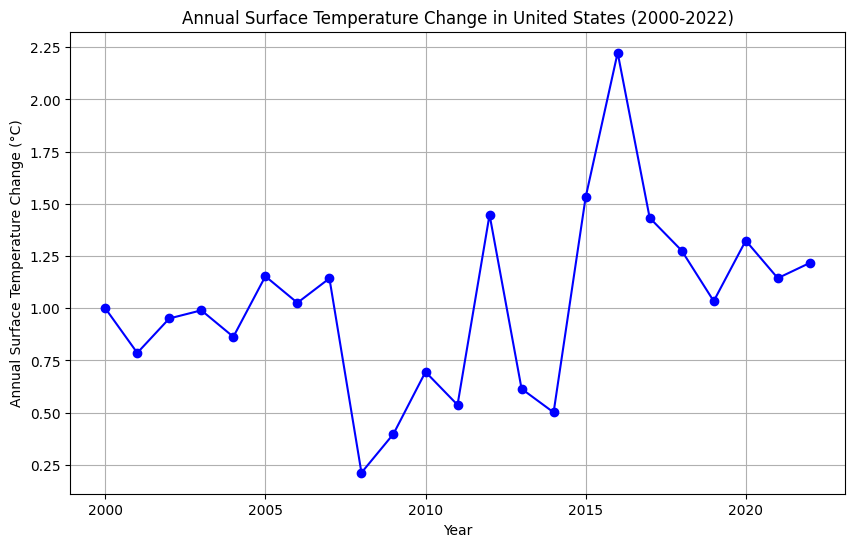

In [9]:
def plot_temp_change(country):
    # output any country on the data set
    csv_filename = f'{country.lower().replace(" ", "_")}_temp_disasters_forestcarbon_2000_2022.csv'
    df = pd.read_csv(csv_filename)
    
    # annual surface temp change
    plt.figure(figsize=(10, 6))
    plt.plot(df['Year'], df['S.Temp Change'], marker='o', linestyle='-', color='b')

    plt.title(f'Annual Surface Temperature Change in {country} (2000-2022)')
    plt.xlabel('Year')
    plt.ylabel('Annual Surface Temperature Change (°C)')
    plt.grid(True)
    plt.show()

# use plot_temp_change to get graph for a country in the dataset
plot_temp_change('United States')


This is a plot for the just the climate related disasters of the country "United States". You can make a plot for any country using the function plot_num_disasters(). This is to show the line graph for climate related disasters for each country. 

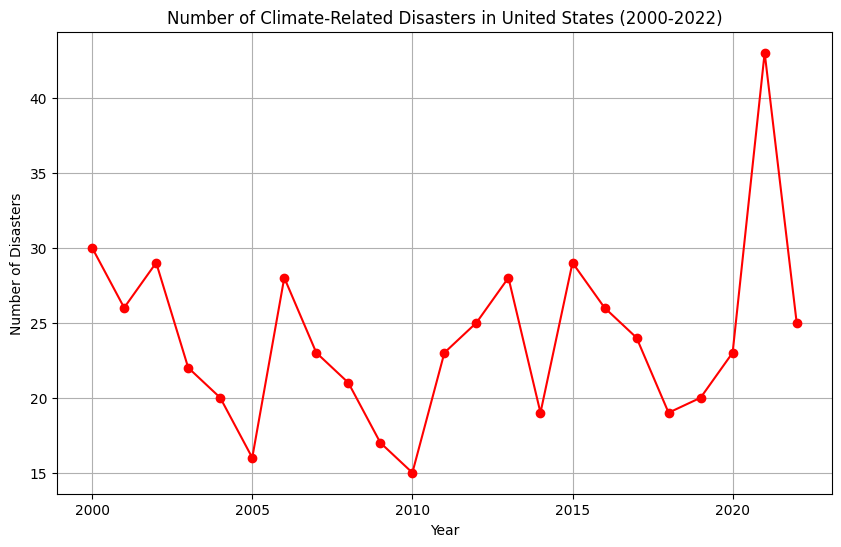

In [10]:
def plot_num_disasters(country):
    # output any country on the data set
    csv_filename = f'{country.lower().replace(" ", "_")}_temp_disasters_forestcarbon_2000_2022.csv'
    df = pd.read_csv(csv_filename)

    # output any country on the data set
    plt.figure(figsize=(10, 6))
    plt.plot(df['Year'], df['Disasters'], marker='o', linestyle='-', color='r')

    plt.title(f'Number of Climate-Related Disasters in {country} (2000-2022)')
    plt.xlabel('Year')
    plt.ylabel('Number of Disasters')
    plt.grid(True)
    plt.show()

# use plot_num_disasters to get graph for a country in the dataset
plot_num_disasters('United States')

This is a plot for the just the forest carbon stock of the country "United States". You can make a plot for any country using the function plot_forest_carbon(). This is to show the line graph for forest carbon stock for each country. 

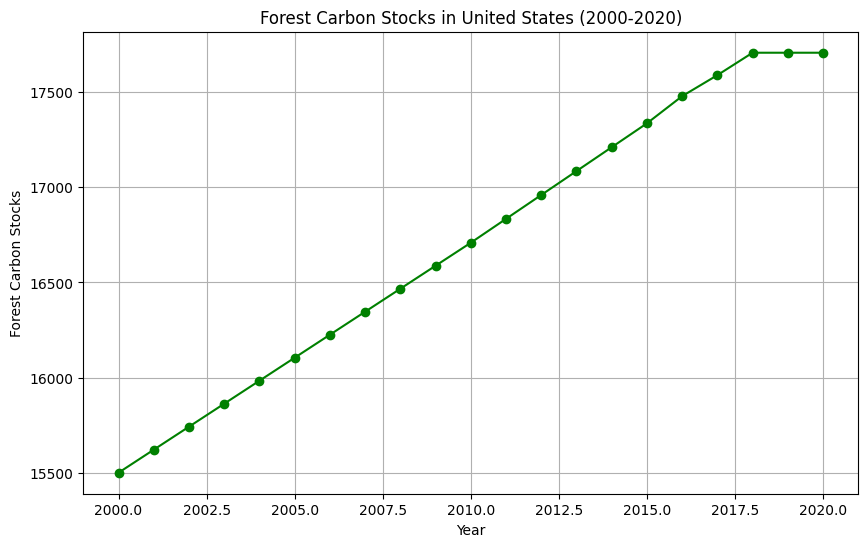

In [11]:
def plot_forest_carbon(country):
    # output any country on the data set
    csv_filename = f'{country.lower().replace(" ", "_")}_temp_disasters_forestcarbon_2000_2022.csv'
    df = pd.read_csv(csv_filename)
    
    # forest carbon
    plt.figure(figsize=(10, 6))
    plt.plot(df['Year'], df['Forest Carbon'], marker='o', linestyle='-', color='g')
    
    plt.title(f'Forest Carbon Stocks in {country} (2000-2020)')
    plt.xlabel('Year')
    plt.ylabel('Forest Carbon Stocks')
    plt.grid(True)
    plt.show()

# use plot_forest_carbon to get graph for a country in the dataset
plot_forest_carbon('United States')


This is a histogram including all 3 climate data values from the main dataset. Using this plot we can see all 3 climate data values at once. 

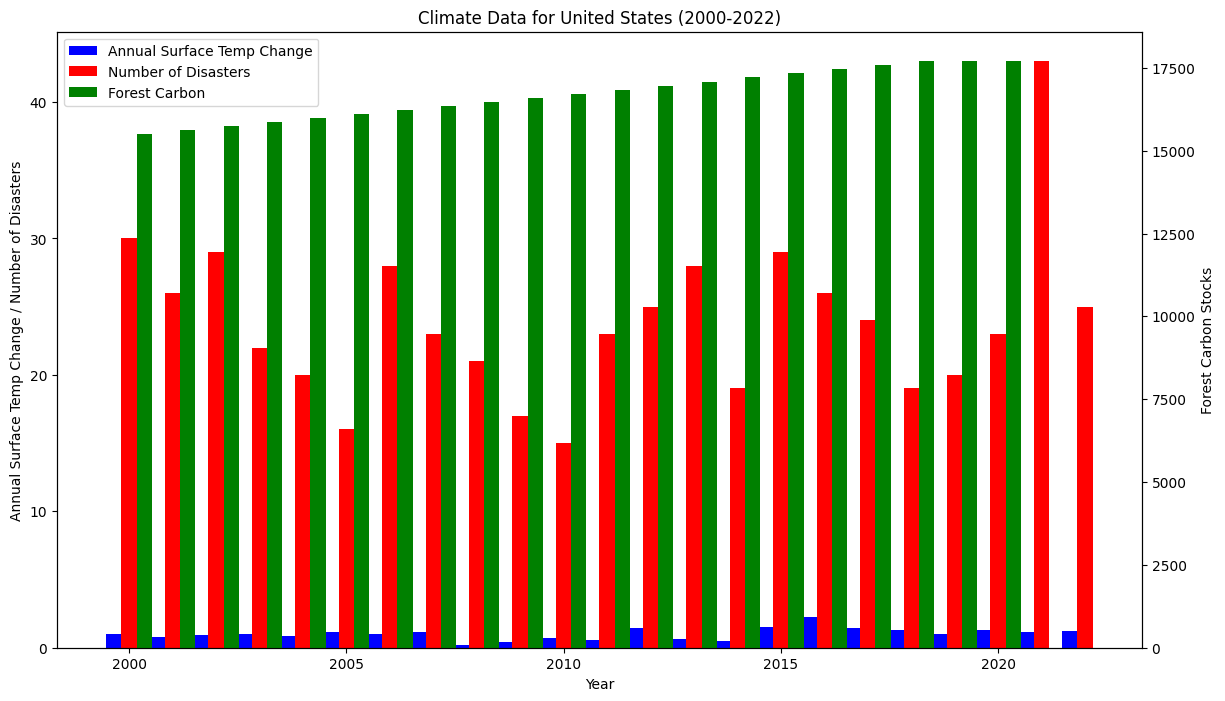

In [12]:
def plot_bar_chart(country):
    # output any country on the data set
    csv_filename = f'{country.lower().replace(" ", "_")}_temp_disasters_forestcarbon_2000_2022.csv'
    df = pd.read_csv(csv_filename)
    
    # bar stats
    fig, ax1 = plt.subplots(figsize=(14, 8))
    bar_width = 0.35
    
    ax1.bar(df['Year'] - bar_width, df['S.Temp Change'], width=bar_width, label='Annual Surface Temp Change', color='b')
    ax1.bar(df['Year'], df['Disasters'], width=bar_width, label='Number of Disasters', color='r')
    ax2 = ax1.twinx()
    ax2.bar(df['Year'] + bar_width, df['Forest Carbon'], width=bar_width, label='Forest Carbon', color='g')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Annual Surface Temp Change / Number of Disasters')
    ax2.set_ylabel('Forest Carbon Stocks')
    ax1.set_title(f'Climate Data for {country} (2000-2022)')
    
    # legend
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1 + h2, l1 + l2, loc='upper left')
    plt.show()

# use plot_bar_chart to get graph for a country in the dataset
plot_bar_chart('United States')


**Mean Sea Level Change and Mean Atmospheric CO2 Concentration (World) from 1993 to 2022**

We also added the dataset mean sea level change and mean atmospheric co2 concentration to observe the upwards trend we saw among the other indicators of climate change. In order to do this we cleaned and combined the two separate datasets into one dataset with a year column ranging from 1993 to 2022 showcasing the world's mean sea level and CO2 level by each year. 

In [14]:
# Sea Levels
data = pd.read_csv("Change_in_Mean_Sea_Levels.csv")

# date column
data['Date'] = pd.to_datetime(data['Date'], format='D%m/%d/%Y')
data['Year'] = data['Date'].dt.year

# get mean for each year
mean_sea_level_by_year = data.groupby('Year')['Value'].mean()

# new dataset with years ranging from 1993 to 2022
new_years = list(range(1993, 2023))
new_data = pd.DataFrame({'Year': new_years})
new_data = pd.merge(new_data, mean_sea_level_by_year, how='left', on='Year')

# rename
new_data.columns = ['Year', 'Mean Sea Level']

# CO2
co2_data = pd.read_csv("Atmospheric_CO2_Concentrations.csv")

# co2 column
co2_data = co2_data[co2_data['Unit'] != 'Percent']
co2_data['Date'] = pd.to_datetime(co2_data['Date'], format='%YM%m')
co2_data['Year'] = co2_data['Date'].dt.year
co2_data = co2_data[co2_data['Year'] != 2024]

# get mean for each year
mean_co2_by_year = co2_data.groupby('Year')['Value'].mean()

# add new column for CO2 levels
new_data['CO2 Levels'] = new_data['Year'].map(mean_co2_by_year)

print(new_data)

    Year  Mean Sea Level  CO2 Levels
0   1993      -20.684635  357.215000
1   1994      -16.753576  358.959167
2   1995       -6.903635  360.968333
3   1996       -7.159048  362.743333
4   1997       -3.745188  363.876667
5   1998        0.425479  366.840000
6   1999        2.762812  368.540000
7   2000        3.911835  369.707500
8   2001        4.532603  371.319167
9   2002        4.368462  373.452500
10  2003       10.552680  375.983333
11  2004       11.026544  377.698333
12  2005        6.557321  379.983333
13  2006        9.242289  382.090833
14  2007       17.426356  384.025000
15  2008       30.510821  385.831667
16  2009       24.612352  387.642500
17  2010       30.322154  390.101667
18  2011       29.844335  391.850833
19  2012       42.438345  394.055833
20  2013       35.923380  396.737500
21  2014       40.601074  398.812500
22  2015       54.125600  401.011667
23  2016       59.508530  404.412500
24  2017       51.109914  406.758333
25  2018       52.734897  408.715000
2

After cleaning the dataset, we created a plot which showcased the same continuous upward trend which is common among indicators of climate change. We will further look into this trend though the techniques and algorithms we used from the cleaned datasets.

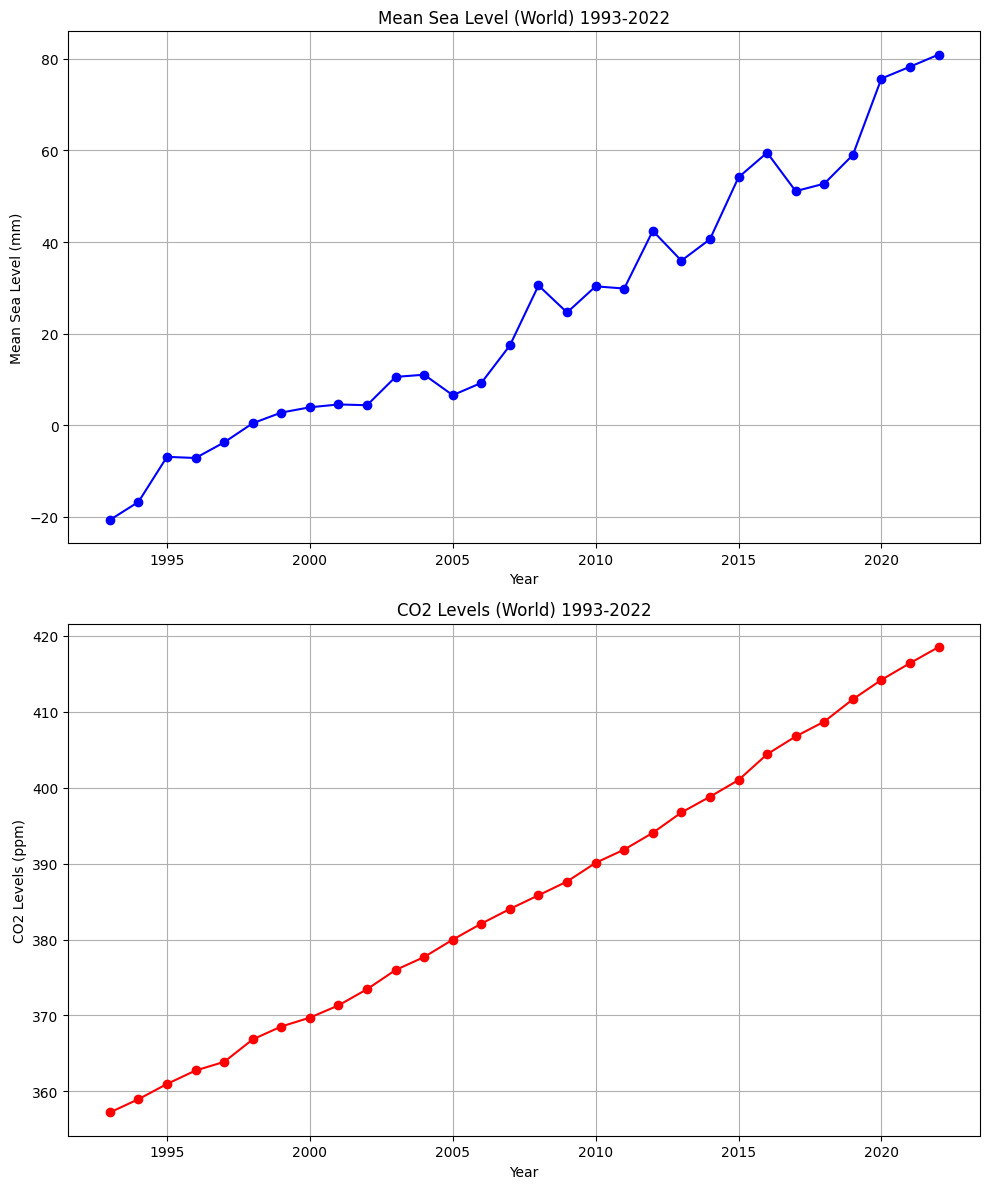

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# mean sea level data
ax1.plot(new_data['Year'], new_data['Mean Sea Level'], marker='o', linestyle='-', color='b')
ax1.set_title('Mean Sea Level (World) 1993-2022')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Sea Level (mm)')
ax1.grid(True)

# CO2 levels data
ax2.plot(new_data['Year'], new_data['CO2 Levels'], marker='o', linestyle='-', color='r')
ax2.set_title('CO2 Levels (World) 1993-2022')
ax2.set_xlabel('Year')
ax2.set_ylabel('CO2 Levels (ppm)')
ax2.grid(True)

plt.tight_layout()

plt.show()

<h2>Supervised Learning: K Nearest Neighbor (KNN) - supervised learning (classification/prediction)<h2>

Use KNN to predict the annual surface temperature change using data from climate related disaster and forest carbon stocks. We will use the KNeighborsRegressor, train_test_split, and mean_squared_error algorithms from sklearn to complete this task. We implemented a get_country_data() function to get the data for a desired country. We first prepare the data initializing the data by training and testing sets and splitting them into separate testing and training sets using the train_test_split we imported from sklearn. We split the data to 20% for testing and 80% for training and train the KNN models using KNeighborsRegressor with n_neighbors being 3. In the case below, we selected the countries United States, Korea, and Spain. After the training part, we use .predict to predict the annual surface temperature change on the test sets based on the trained parts. We implemented mean_square_error to show the mean square error of the predicted value to the actual value. Lastly we printed the MSE and the predicted values for each country which can be seen in the output below.

In [16]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# use to choose which country data to get from the data sets
def get_country_data(country):
    # read and get data values
    temp_df = pd.read_csv('Annual_Surface_Temperature_Change.csv')
    disasters_df = pd.read_csv('Climate-related_Disasters_Frequency.csv')
    forestcarbon_df = pd.read_csv('Forest_and_Carbon.csv')
    country_temp_df = temp_df[temp_df['Country'] == country]
    country_disasters_df = disasters_df[(disasters_df['Country'] == country) & (disasters_df['Indicator'] == 'Climate related disasters frequency, Number of Disasters: TOTAL')]
    country_forestcarbon_df = forestcarbon_df[(forestcarbon_df['Country'] == country) & (forestcarbon_df['Indicator'] == 'Carbon stocks in forests')]

    # annual surface temp change
    years_temp_disasters = [f'F{year}' for year in range(2000, 2023)]
    country_temp_selected_years = country_temp_df[years_temp_disasters]
    temp_data = {
        'Year': list(range(2000, 2023)),
        'S.Temp Change': country_temp_selected_years.values.flatten()
    }
    new_df = pd.DataFrame(temp_data)

    # climate related disasters
    country_disasters_selected_years = country_disasters_df[years_temp_disasters].values.flatten()
    new_df['Disasters'] = country_disasters_selected_years

    # forest carbon data
    years_forestcarbon = [f'F{year}' for year in range(2000, 2021)]
    country_forestcarbon_selected_years = country_forestcarbon_df[years_forestcarbon].values.flatten()
    new_df['Forest Carbon'] = pd.Series(country_forestcarbon_selected_years, index=new_df.index[:len(country_forestcarbon_selected_years)])

    return new_df

# use get_country_data to get data for a country in the dataset
us_data = get_country_data('United States')
spain_data = get_country_data('Spain')
korea_data = get_country_data('Korea, Rep. of')
# fill missing values with 0
us_data.fillna(0, inplace=True)
spain_data.fillna(0, inplace=True)
korea_data.fillna(0, inplace=True)

# prepare data
X_us = us_data[['Year', 'Disasters', 'Forest Carbon']]
y_us = us_data['S.Temp Change']

X_spain = spain_data[['Year', 'Disasters', 'Forest Carbon']]
y_spain = spain_data['S.Temp Change']

X_korea = korea_data[['Year', 'Disasters', 'Forest Carbon']]
y_korea = korea_data['S.Temp Change']

# split into training and test sets (20% for testing 80% for training)
X_us_train, X_us_test, y_us_train, y_us_test = train_test_split(X_us, y_us, test_size=0.2, random_state=42)
X_spain_train, X_spain_test, y_spain_train, y_spain_test = train_test_split(X_spain, y_spain, test_size=0.2, random_state=42)
X_korea_train, X_korea_test, y_korea_train, y_korea_test = train_test_split(X_korea, y_korea, test_size=0.2, random_state=42)

# train KNN models
knn_us = KNeighborsRegressor(n_neighbors=3)
knn_us.fit(X_us_train, y_us_train)

knn_spain = KNeighborsRegressor(n_neighbors=3)
knn_spain.fit(X_spain_train, y_spain_train)

knn_korea = KNeighborsRegressor(n_neighbors=3)
knn_korea.fit(X_korea_train, y_korea_train)

# predict on test set
us_predictions = knn_us.predict(X_us_test)
spain_predictions = knn_spain.predict(X_spain_test)
korea_predictions = knn_korea.predict(X_korea_test)

# mean squared error between the predicted values and the acutal values
us_mse = mean_squared_error(y_us_test, us_predictions)
spain_mse = mean_squared_error(y_spain_test, spain_predictions)
korea_mse = mean_squared_error(y_korea_test, korea_predictions)
print("United States MSE:", us_mse)
print("Spain MSE:", spain_mse)
print("Korea MSE:", korea_mse)

# United States
print("\nPredicted surface temperature changes for United States:")
for year, prediction in zip(X_us_test['Year'], us_predictions):
    print(f"{year}: {prediction}")

# Spain
print("\nPredicted surface temperature changes for Spain:")
for year, prediction in zip(X_spain_test['Year'], spain_predictions):
    print(f"{year}: {prediction}")

# Korea
print("\nPredicted surface temperature changes for Korea:")
for year, prediction in zip(X_korea_test['Year'], korea_predictions):
    print(f"{year}: {prediction}")


United States MSE: 0.17968619999999996
Spain MSE: 0.11315631111111113
Korea MSE: 0.0458545111111111

Predicted surface temperature changes for United States:
2015: 1.113
2009: 0.7916666666666666
2000: 0.9089999999999999
2008: 0.9546666666666667
2017: 1.5273333333333332

Predicted surface temperature changes for Spain:
2015: 1.1840000000000002
2009: 1.188
2000: 1.272
2008: 1.0896666666666668
2017: 1.6486666666666665

Predicted surface temperature changes for Korea:
2015: 1.0476666666666665
2009: 0.6816666666666666
2000: 0.7203333333333334
2008: 0.7376666666666667
2017: 1.3626666666666667


We can use KNN to predict the annual surface temperature change, given a value for climate related disaster and forest carbon stock. In this example below we used the values 21 for disaster and 10000 for forest carbon as the values for the year 2024 to find the predicted surface temperature change for that year given the values of disaster and forest carbon which can be seen in the output below.

In [17]:
# prediction for selected year
p_year = [2024]
P_data_us = pd.DataFrame({
    'Year': p_year,
    'Disasters': [21], # replace [] with given value for disaster
    'Forest Carbon': [10000]  # replace [] with given value for forest carbon
})

P_data_spain = P_data_us.copy()
P_data_korea = P_data_us.copy()

# predict annual surface temperature changes
P_prediction_us = knn_us.predict(P_data_us)
P_prediction_spain = knn_spain.predict(P_data_spain)
P_prediction_korea = knn_korea.predict(P_data_korea)

# United States
print("\nPredicted surface temperature change for United States (2024):")
print(f"2024: {P_prediction_us[0]}")

# Spain
print("\nPredicted surface temperature change for Spain (2024):")
print(f"2024: {P_prediction_spain[0]}")

# Korea
print("\nPredicted surface temperature change for Korea (2024):")
print(f"2024: {P_prediction_korea[0]}")


Predicted surface temperature change for United States (2024):
2024: 0.9089999999999999

Predicted surface temperature change for Spain (2024):
2024: 1.5886666666666667

Predicted surface temperature change for Korea (2024):
2024: 1.3339999999999999


<h2>K Means Clustering - unsupervised learning (grouping)<h2>

Use K Means Clustering to group similar countries to observe patterns and similarities in climate change in different regions. We wanted to see if regions closer to each other clustered together and whether that would change in time. We created 3 separate K Means Clustering models: one clusters based on annual surface temperature change, the second clusters based on number of disasters, and the third clusters based on forest carbon stock. Similar to what we did for KNN, we had the get_country_data() function to get the data for a desired country. In this case we used the countries United States, Spain, Korea, Japan, France, and Mexico. We created a function for clustering as we would need to do this several times for the years 2000, 2010, and 2020. In the perform_clustering() function we first got the country's data on surface temperature change as we would need that to perform K Means clustering. Then we added a simple line of code turning NaN values into 0 incase there are NaNs in the dataset, and initialized 3 centers. We then performed K-Means clustering using the KMeans() algorithm from sklearn to create 3 clusters for each country that was mentioned. 

In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# use to choose which country data to get from the data sets
def get_country_data(country):
    # read and get data values
    temp_df = pd.read_csv('Annual_Surface_Temperature_Change.csv')
    disasters_df = pd.read_csv('Climate-related_Disasters_Frequency.csv')
    forestcarbon_df = pd.read_csv('Forest_and_Carbon.csv')
    country_temp_df = temp_df[temp_df['Country'] == country]
    country_disasters_df = disasters_df[(disasters_df['Country'] == country) & (disasters_df['Indicator'] == 'Climate related disasters frequency, Number of Disasters: TOTAL')]
    country_forestcarbon_df = forestcarbon_df[(forestcarbon_df['Country'] == country) & (forestcarbon_df['Indicator'] == 'Carbon stocks in forests')]

    # annual surface temp change
    years_temp_disasters = [f'F{year}' for year in range(2000, 2023)]
    country_temp_selected_years = country_temp_df[years_temp_disasters]
    temp_data = {
        'Year': list(range(2000, 2023)),
        'S.Temp Change': country_temp_selected_years.values.flatten()
    }
    new_df = pd.DataFrame(temp_data)

    # climate related disasters
    country_disasters_selected_years = country_disasters_df[years_temp_disasters].values.flatten()
    new_df['Disasters'] = country_disasters_selected_years

    # forest carbon data
    years_forestcarbon = [f'F{year}' for year in range(2000, 2021)]
    country_forestcarbon_selected_years = country_forestcarbon_df[years_forestcarbon].values.flatten()
    new_df['Forest Carbon'] = pd.Series(country_forestcarbon_selected_years, index=new_df.index[:len(country_forestcarbon_selected_years)])

    return new_df

# countries 
countries = ['United States', 'Spain', 'Korea, Rep. of', 'Japan', 'France', 'Mexico']

# function to cluster for given year
def perform_clustering(year):
    # data for all countries and extract the temperature change for given year
    data_year = []
    for country in countries:
        country_data = get_country_data(country)
        temp_change_year = country_data[country_data['Year'] == year]['S.Temp Change'].values[0]
        data_year.append(temp_change_year)
        
    # Nan to zero
    data_year = [0 if pd.isna(x) else x for x in data_year]

    # initial centers
    initial_centers = [
        data_year[countries.index('Korea, Rep. of')],
        data_year[countries.index('United States')],
        data_year[countries.index('Spain')]
    ]
    
    data_year_df = pd.DataFrame({'Country': countries, f'Temp Change {year}': data_year})

    # K-means clustering
    kmeans = KMeans(n_clusters=3, init=pd.DataFrame(initial_centers).values.reshape(-1, 1), n_init=1)
    data_year_df['Cluster'] = kmeans.fit_predict(data_year_df[[f'Temp Change {year}']])

    print(f"\nClustering results based on {year} surface temperature change:")
    print(data_year_df[['Country', f'Temp Change {year}', 'Cluster']])
    print("\n")

# clustering for the years 2000, 2010, and 2020
perform_clustering(2000)
perform_clustering(2010)
perform_clustering(2020)




Clustering results based on 2000 surface temperature change:
          Country  Temp Change 2000  Cluster
0   United States             1.000        1
1           Spain             0.810        2
2  Korea, Rep. of             0.414        0
3           Japan             0.636        2
4          France             1.175        1
5          Mexico             0.634        2



Clustering results based on 2010 surface temperature change:
          Country  Temp Change 2010  Cluster
0   United States             0.695        1
1           Spain             0.908        2
2  Korea, Rep. of             0.498        0
3           Japan             0.922        2
4          France             0.395        0
5          Mexico             0.306        0



Clustering results based on 2020 surface temperature change:
          Country  Temp Change 2020  Cluster
0   United States             1.324        1
1           Spain             2.083        2
2  Korea, Rep. of             1.551        0


The results above show 3 clusters for the years 2000, 2010, and 2020 classified as: 0, 1, and 2.
In the results for 2000 we see the clusters 0: [Korea] cluster 1: [United States, France] cluster 2: [Spain, Japan, Mexico]. In the results for 2010 we see the clusters 0: [Korea, France, Mexico] cluster 1: [United States] cluster 2: [Spain, Japan]. In the results for 2020 we see the clusters 0: [Korea, Mexico] cluster 1: [United States, Japan] cluster 2: [Spain, France]. We can see that the clusters are not consistent throughout the year and shows that surface temperature change is not always consistent among regions that are close to each other. The plot below shows a graph of the clustering by color.

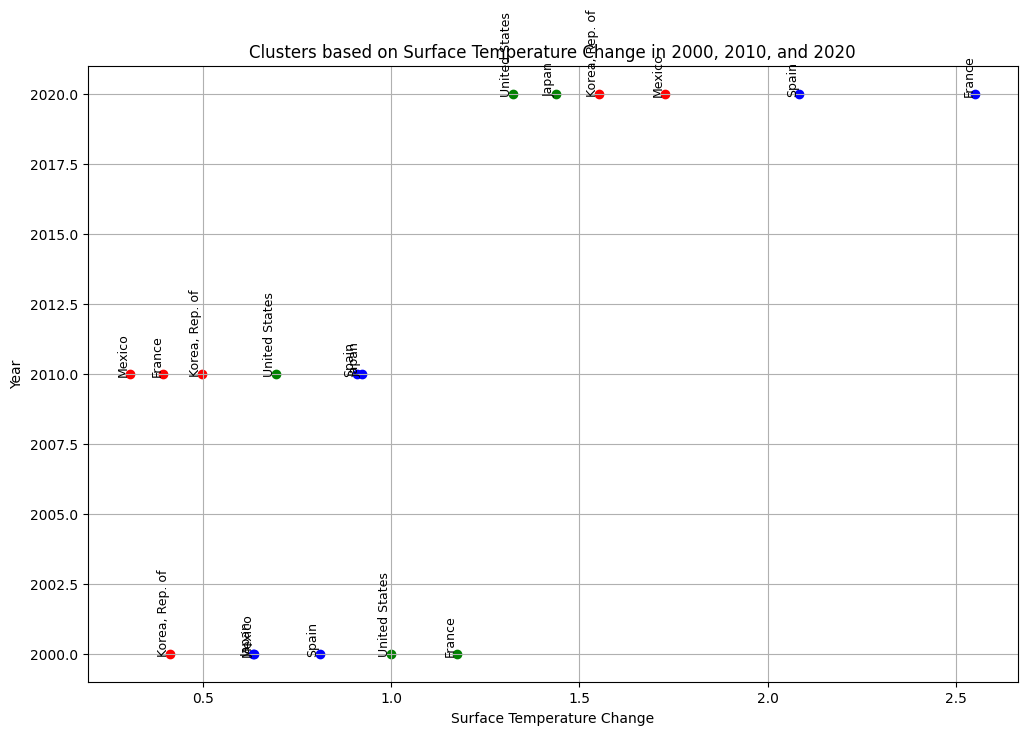

In [19]:
import matplotlib.pyplot as plt

def plot_all_clusters(data_2000, data_2010, data_2020):
    plt.figure(figsize=(12, 8))
    
    colors = ['red', 'green', 'blue']
    
    # scatter plot for 2000
    for cluster in data_2000['Cluster'].unique():
        cluster_data = data_2000[data_2000['Cluster'] == cluster]
        plt.scatter(cluster_data['Temp Change 2000'], [2000] * len(cluster_data), color=colors[cluster])
        for i, row in cluster_data.iterrows():
            plt.text(row['Temp Change 2000'], 2000, row['Country'], fontsize=9, ha='right', rotation=90)
    
    # scatter plot for 2010
    for cluster in data_2010['Cluster'].unique():
        cluster_data = data_2010[data_2010['Cluster'] == cluster]
        plt.scatter(cluster_data['Temp Change 2010'], [2010] * len(cluster_data), 
                    color=colors[cluster])
        for i, row in cluster_data.iterrows():
            plt.text(row['Temp Change 2010'], 2010, row['Country'], fontsize=9, ha='right', rotation=90)
    
    # scatter plot for 2020
    for cluster in data_2020['Cluster'].unique():
        cluster_data = data_2020[data_2020['Cluster'] == cluster]
        plt.scatter(cluster_data['Temp Change 2020'], [2020] * len(cluster_data), 
                    color=colors[cluster])
        for i, row in cluster_data.iterrows():
            plt.text(row['Temp Change 2020'], 2020, row['Country'], fontsize=9, ha='right', rotation=90)
    
    plt.title('Clusters based on Surface Temperature Change in 2000, 2010, and 2020')
    plt.xlabel('Surface Temperature Change')
    plt.ylabel('Year')
    plt.grid(True)
    plt.show()

def perform_clustering_for_year(year):
    # data for all countries and extract the temperature change for given year
    data_year = []
    for country in countries:
        country_data = get_country_data(country)
        temp_change_year = country_data[country_data['Year'] == year]['S.Temp Change'].values[0]
        data_year.append(temp_change_year)

    # initial centers
    initial_centers = [
        data_year[countries.index('Korea, Rep. of')],
        data_year[countries.index('United States')],
        data_year[countries.index('Spain')]
    ]

    data_year_df = pd.DataFrame({'Country': countries, f'Temp Change {year}': data_year})

    # K-means clustering
    kmeans = KMeans(n_clusters=3, init=pd.DataFrame(initial_centers).values.reshape(-1, 1), n_init=1)
    data_year_df['Cluster'] = kmeans.fit_predict(data_year_df[[f'Temp Change {year}']])

    return data_year_df

# clustering for the years 2000, 2010, and 2020
data_2000 = perform_clustering_for_year(2000)
data_2010 = perform_clustering_for_year(2010)
data_2020 = perform_clustering_for_year(2020)

plot_all_clusters(data_2000, data_2010, data_2020)


For the second model we did the exact same thing as the first model except switch the clustering value to number of disasters rather than surface temperature change. We used the same countries: United States, Spain, Korea, Japan, France, and Mexico. Using the function perform_clustering_based_on_disasters(), we did the same thing as the previous model in getting the disaster values, performing K Means clustering using KMeans from sklearn to create 3 clusters for each country mentioned.

In [20]:
import pandas as pd
from sklearn.cluster import KMeans

# use to choose which country data to get from the data sets
def get_country_data(country):
    # read and get data values
    temp_df = pd.read_csv('Annual_Surface_Temperature_Change.csv')
    disasters_df = pd.read_csv('Climate-related_Disasters_Frequency.csv')
    forestcarbon_df = pd.read_csv('Forest_and_Carbon.csv')
    country_temp_df = temp_df[temp_df['Country'] == country]
    country_disasters_df = disasters_df[(disasters_df['Country'] == country) & (disasters_df['Indicator'] == 'Climate related disasters frequency, Number of Disasters: TOTAL')]
    country_forestcarbon_df = forestcarbon_df[(forestcarbon_df['Country'] == country) & (forestcarbon_df['Indicator'] == 'Carbon stocks in forests')]

    # annual surface temp change
    years_temp_disasters = [f'F{year}' for year in range(2000, 2023)]
    country_temp_selected_years = country_temp_df[years_temp_disasters]
    temp_data = {
        'Year': list(range(2000, 2023)),
        'S.Temp Change': country_temp_selected_years.values.flatten()
    }
    new_df = pd.DataFrame(temp_data)

    # climate related disasters
    country_disasters_selected_years = country_disasters_df[years_temp_disasters].values.flatten()
    new_df['Disasters'] = country_disasters_selected_years

    # forest carbon data
    years_forestcarbon = [f'F{year}' for year in range(2000, 2021)]
    country_forestcarbon_selected_years = country_forestcarbon_df[years_forestcarbon].values.flatten()
    new_df['Forest Carbon'] = pd.Series(country_forestcarbon_selected_years, index=new_df.index[:len(country_forestcarbon_selected_years)])

    return new_df

# countries
countries = ['United States', 'Spain', 'Korea, Rep. of', 'Japan', 'France', 'Mexico']

# function to cluster for given year
def perform_clustering_based_on_disasters(year):
     # data for all countries and extract the temperature change for given year
    data_year = []
    for country in countries:
        country_data = get_country_data(country)
        disasters_year = country_data[country_data['Year'] == year]['Disasters'].values[0]
        data_year.append(disasters_year)

    # Nan to zero
    data_year = [0 if pd.isna(x) else x for x in data_year]
    
    # initial centers
    initial_centers = [
        data_year[countries.index('Korea, Rep. of')],
        data_year[countries.index('United States')],
        data_year[countries.index('Spain')]
    ]

    data_year_df = pd.DataFrame({'Country': countries, f'Disasters {year}': data_year})

    # K-means clustering
    kmeans = KMeans(n_clusters=3, init=pd.DataFrame(initial_centers).values.reshape(-1, 1), n_init=1)
    data_year_df['Cluster'] = kmeans.fit_predict(data_year_df[[f'Disasters {year}']])

    print(f"\nClustering results based on {year} number of disasters:")
    print(data_year_df[['Country', f'Disasters {year}', 'Cluster']])
    print("\n")

# clustering for the years 2000, 2010, and 2020
perform_clustering_based_on_disasters(2000)
perform_clustering_based_on_disasters(2010)
perform_clustering_based_on_disasters(2020)



Clustering results based on 2000 number of disasters:
          Country  Disasters 2000  Cluster
0   United States            30.0        1
1           Spain             5.0        0
2  Korea, Rep. of             5.0        0
3           Japan             4.0        0
4          France             7.0        2
5          Mexico             6.0        0



Clustering results based on 2010 number of disasters:
          Country  Disasters 2010  Cluster
0   United States            15.0        1
1           Spain             2.0        0
2  Korea, Rep. of             1.0        0
3           Japan             2.0        0
4          France             4.0        2
5          Mexico             8.0        2



Clustering results based on 2020 number of disasters:
          Country  Disasters 2020  Cluster
0   United States            23.0        1
1           Spain             1.0        2
2  Korea, Rep. of             5.0        0
3           Japan             4.0        0
4          Fra

The results above show 3 clusters for the years 2000, 2010, and 2020 classified as: 0, 1, and 2.
In the results for 2000 we see the clusters 0: [Spain, Korea, Japan, Mexico] cluster 1: [United States] cluster 2: [France]. In the results for 2010 we see the clusters 0: [Spain, Korea, Japan, ] cluster 1: [United States] cluster 2: [France, Mexico]. In the results for 2020 we see the clusters 0: [Korea, Japan, France, Mexico] cluster 1: [United States] cluster 2: [Spain]. We can see that the clusters are a some what consistent throughout the years but shows that number of disaster is not always consistent among regions that are close to each other. The plot below shows a graph of the clustering by color.

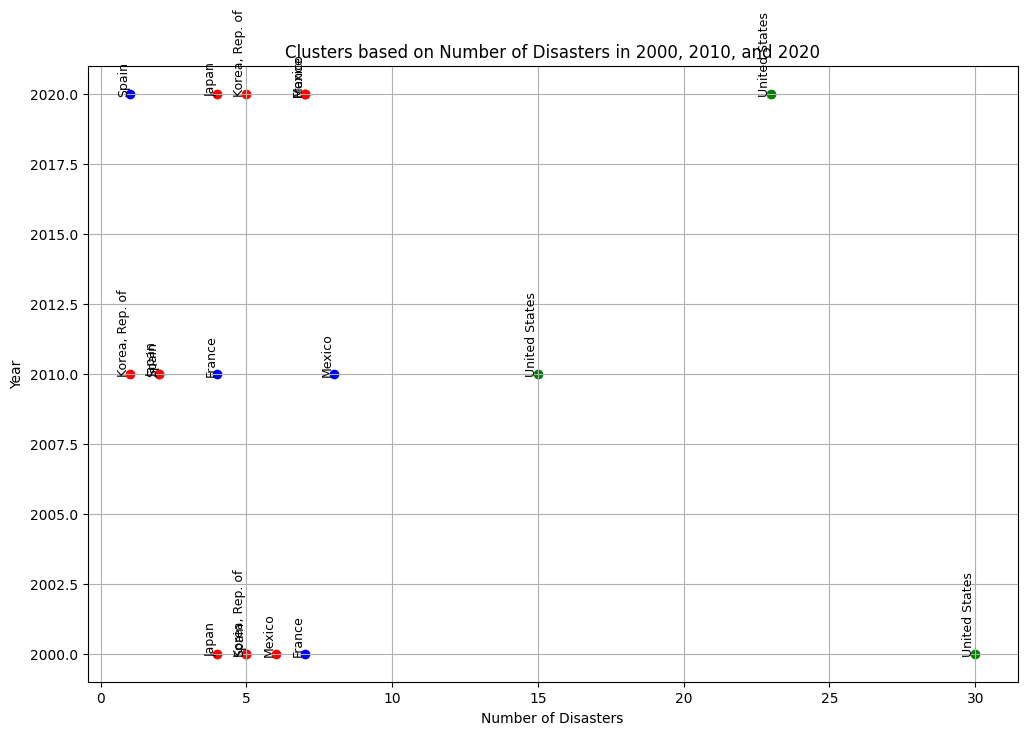

In [21]:
import matplotlib.pyplot as plt

def plot_all_clusters(data_2000, data_2010, data_2020):
    plt.figure(figsize=(12, 8))
    
    colors = ['red', 'green', 'blue']
    
    # scatter plot for 2000
    for cluster in data_2000['Cluster'].unique():
        cluster_data = data_2000[data_2000['Cluster'] == cluster]
        plt.scatter(cluster_data['Disasters 2000'], [2000] * len(cluster_data), 
                    color=colors[cluster])
        for i, row in cluster_data.iterrows():
            plt.text(row['Disasters 2000'], 2000, row['Country'], fontsize=9, ha='right', rotation=90)
    
    # scatter plot for 2010
    for cluster in data_2010['Cluster'].unique():
        cluster_data = data_2010[data_2010['Cluster'] == cluster]
        plt.scatter(cluster_data['Disasters 2010'], [2010] * len(cluster_data), 
                    color=colors[cluster])
        for i, row in cluster_data.iterrows():
            plt.text(row['Disasters 2010'], 2010, row['Country'], fontsize=9, ha='right', rotation=90)
    
    # scatter plot for 2020
    for cluster in data_2020['Cluster'].unique():
        cluster_data = data_2020[data_2020['Cluster'] == cluster]
        plt.scatter(cluster_data['Disasters 2020'], [2020] * len(cluster_data), 
                    color=colors[cluster])
        for i, row in cluster_data.iterrows():
            plt.text(row['Disasters 2020'], 2020, row['Country'], fontsize=9, ha='right', rotation=90)
    
    plt.title('Clusters based on Number of Disasters in 2000, 2010, and 2020')
    plt.xlabel('Number of Disasters')
    plt.ylabel('Year')
    plt.grid(True)
    plt.show()

def perform_clustering_for_year(year):
    # data for all countries and extract the temperature change for given year
    data_year = []
    for country in countries:
        country_data = get_country_data(country)
        disasters_year = country_data[country_data['Year'] == year]['Disasters'].values[0]
        data_year.append(disasters_year)

    # Nan to zero
    data_year = [0 if pd.isna(x) else x for x in data_year]

    # initial centers
    initial_centers = [
        data_year[countries.index('Korea, Rep. of')],
        data_year[countries.index('United States')],
        data_year[countries.index('Spain')]
    ]

    data_year_df = pd.DataFrame({'Country': countries, f'Disasters {year}': data_year})

    # K-means clustering
    kmeans = KMeans(n_clusters=3, init=pd.DataFrame(initial_centers).values.reshape(-1, 1), n_init=1)
    data_year_df['Cluster'] = kmeans.fit_predict(data_year_df[[f'Disasters {year}']])

    return data_year_df

# clustering for the years 2000, 2010, and 2020
data_2000 = perform_clustering_for_year(2000)
data_2010 = perform_clustering_for_year(2010)
data_2020 = perform_clustering_for_year(2020)

plot_all_clusters(data_2000, data_2010, data_2020)


For the third model we did the exact same thing as the first and second model except switch the clustering value to forest carbon stock. We used the same countries: United States, Spain, Korea, Japan, France, and Mexico. Using the function perform_clustering_forest_carbon(), we did the same thing as the previous models in getting the carbon stock values, performing K Means clustering using KMeans from sklearn to create 3 clusters for each country mentioned.

In [22]:
import pandas as pd
from sklearn.cluster import KMeans

# use to choose which country data to get from the data sets
def get_country_data(country):
    # read and get data values
    temp_df = pd.read_csv('Annual_Surface_Temperature_Change.csv')
    disasters_df = pd.read_csv('Climate-related_Disasters_Frequency.csv')
    forestcarbon_df = pd.read_csv('Forest_and_Carbon.csv')
    country_temp_df = temp_df[temp_df['Country'] == country]
    country_disasters_df = disasters_df[(disasters_df['Country'] == country) & (disasters_df['Indicator'] == 'Climate related disasters frequency, Number of Disasters: TOTAL')]
    country_forestcarbon_df = forestcarbon_df[(forestcarbon_df['Country'] == country) & (forestcarbon_df['Indicator'] == 'Carbon stocks in forests')]

    # annual surface temp change
    years_temp_disasters = [f'F{year}' for year in range(2000, 2023)]
    country_temp_selected_years = country_temp_df[years_temp_disasters]
    temp_data = {
        'Year': list(range(2000, 2023)),
        'S.Temp Change': country_temp_selected_years.values.flatten()
    }
    new_df = pd.DataFrame(temp_data)

    # climate related disasters
    country_disasters_selected_years = country_disasters_df[years_temp_disasters].values.flatten()
    new_df['Disasters'] = country_disasters_selected_years

    # forest carbon data
    years_forestcarbon = [f'F{year}' for year in range(2000, 2021)]
    country_forestcarbon_selected_years = country_forestcarbon_df[years_forestcarbon].values.flatten()
    new_df['Forest Carbon'] = pd.Series(country_forestcarbon_selected_years, index=new_df.index[:len(country_forestcarbon_selected_years)])

    return new_df

# countries
countries = ['United States', 'Spain', 'Korea, Rep. of', 'Japan', 'France', 'Mexico']

# function to cluster for given year
def perform_clustering_forest_carbon(year):
    # data for all countries and extract the temperature change for given year
    data_year = []
    for country in countries:
        country_data = get_country_data(country)
        forest_carbon_year = country_data[country_data['Year'] == year]['Forest Carbon'].values[0]
        data_year.append(forest_carbon_year)
        
    # Nan to zero
    data_year = [0 if pd.isna(x) else x for x in data_year]
    
    # initial centers
    initial_centers = [
        data_year[countries.index('Korea, Rep. of')],
        data_year[countries.index('United States')],
        data_year[countries.index('France')]
    ]

    data_year_df = pd.DataFrame({'Country': countries, f'Forest Carbon {year}': data_year})

    # K-means clustering
    kmeans = KMeans(n_clusters=3, init=pd.DataFrame(initial_centers).values.reshape(-1, 1), n_init=1)
    data_year_df['Cluster'] = kmeans.fit_predict(data_year_df[[f'Forest Carbon {year}']])

    print(f"\nClustering results based on {year} forest carbon stocks:")
    print(data_year_df[['Country', f'Forest Carbon {year}', 'Cluster']])
    print("\n")

# clustering for the years 2000, 2010, and 2020
perform_clustering_forest_carbon(2000)
perform_clustering_forest_carbon(2010)
perform_clustering_forest_carbon(2020)



Clustering results based on 2000 forest carbon stocks:
          Country  Forest Carbon 2000  Cluster
0   United States          15501.5835        1
1           Spain            629.5694        0
2  Korea, Rep. of            250.3622        0
3           Japan           1368.1800        2
4          France           1047.2280        2
5          Mexico           1882.5386        2



Clustering results based on 2010 forest carbon stocks:
          Country  Forest Carbon 2010  Cluster
0   United States          16707.9264        1
1           Spain            683.0249        0
2  Korea, Rep. of            414.3247        0
3           Japan           1647.7560        2
4          France           1242.9183        2
5          Mexico           2064.5317        2



Clustering results based on 2020 forest carbon stocks:
          Country  Forest Carbon 2020  Cluster
0   United States          17704.7843        1
1           Spain            713.9142        0
2  Korea, Rep. of            

The results above show 3 clusters for the years 2000, 2010, and 2020 classified as: 0, 1, and 2.
In the results for 2000 we see the clusters 0: [Korea, Spain] cluster 1: [United States] cluster 2: [France, Japan, Mexico]. In the results for 2010 we see the clusters 0: [Korea, Spain] cluster 1: [United States] cluster 2: [France, Japan, Mexico]. In the results for 2020 we see the clusters 0: [Korea, Spain] cluster 1: [United States] cluster 2: [France, Japan, Mexico]. We can see that the clusters are very consistent throughout the years but this is not a good thing. The values for forest carbon stocks are pretty consistent throughout the years with big gap between countries depending on different factors other then climate change such as land mass and geography. The plot below shows a graph of the clustering by color.

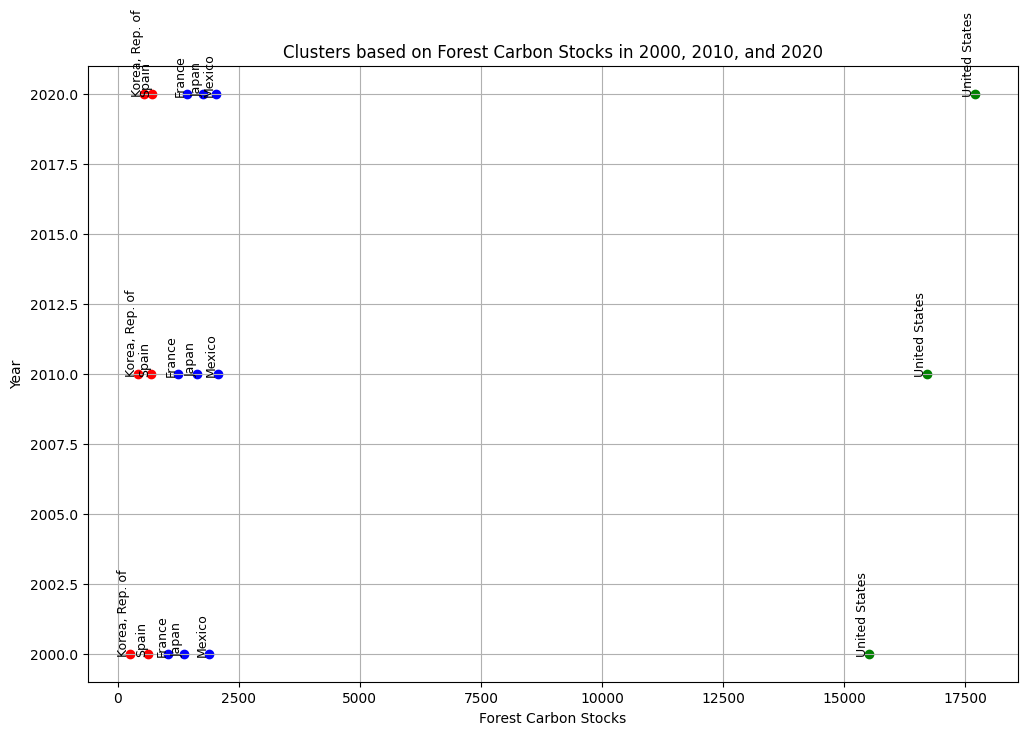

In [23]:
import matplotlib.pyplot as plt

def plot_all_clusters(data_2000, data_2010, data_2020):
    plt.figure(figsize=(12, 8))
    
    colors = ['red', 'green', 'blue']
    
    # scatter plot for 2000
    for cluster in data_2000['Cluster'].unique():
        cluster_data = data_2000[data_2000['Cluster'] == cluster]
        plt.scatter(cluster_data[f'Forest Carbon 2000'], [2000] * len(cluster_data), 
                    color=colors[cluster])
        for i, row in cluster_data.iterrows():
            plt.text(row[f'Forest Carbon 2000'], 2000, row['Country'], fontsize=9, ha='right', rotation=90)
    
    # scatter plot for 2010
    for cluster in data_2010['Cluster'].unique():
        cluster_data = data_2010[data_2010['Cluster'] == cluster]
        plt.scatter(cluster_data[f'Forest Carbon 2010'], [2010] * len(cluster_data), 
                    color=colors[cluster])
        for i, row in cluster_data.iterrows():
            plt.text(row[f'Forest Carbon 2010'], 2010, row['Country'], fontsize=9, ha='right', rotation=90)
    
    # scatter plot for 2020
    for cluster in data_2020['Cluster'].unique():
        cluster_data = data_2020[data_2020['Cluster'] == cluster]
        plt.scatter(cluster_data[f'Forest Carbon 2020'], [2020] * len(cluster_data), 
                    color=colors[cluster])
        for i, row in cluster_data.iterrows():
            plt.text(row[f'Forest Carbon 2020'], 2020, row['Country'], fontsize=9, ha='right', rotation=90)
    
    plt.title('Clusters based on Forest Carbon Stocks in 2000, 2010, and 2020')
    plt.xlabel('Forest Carbon Stocks')
    plt.ylabel('Year')
    plt.grid(True)
    plt.show()

def perform_clustering_forest_carbon(year):
    # data for all countries and extract the temperature change for given year
    data_year = []
    for country in countries:
        country_data = get_country_data(country)
        forest_carbon_year = country_data[country_data['Year'] == year]['Forest Carbon'].values[0]
        data_year.append(forest_carbon_year)

    # initial centers
    initial_centers = [
        data_year[countries.index('Korea, Rep. of')],
        data_year[countries.index('United States')],
        data_year[countries.index('Spain')]
    ]

    data_year_df = pd.DataFrame({'Country': countries, f'Forest Carbon {year}': data_year})

    # K-means clustering
    kmeans = KMeans(n_clusters=3, init=pd.DataFrame(initial_centers).values.reshape(-1, 1), n_init=1)
    data_year_df['Cluster'] = kmeans.fit_predict(data_year_df[[f'Forest Carbon {year}']])

    return data_year_df

# clustering for the years 2000, 2010, and 2020
data_2000 = perform_clustering_forest_carbon(2000)
data_2010 = perform_clustering_forest_carbon(2010)
data_2020 = perform_clustering_forest_carbon(2020)

plot_all_clusters(data_2000, data_2010, data_2020)


Looking at the three K Means model and the results it produced we saw that the data on diseases and carbon stocks were less reliable than annual surface temperature when looking at the data values individually in relation to climate change.

<h2>Analysis: Linear Regression and Pearson Correlation Coefficient<h2>

To analyze the datasets to understand which factor impacts climate change the most. To conduct this analysis we used linear regression. We compared the linear relationship between the factors, carbon dioxide and carbon stocks in forests, and the impacts on climate change observed through the concentration in the atmosphere and temperature rise and sea levels. 

In [24]:
# Average Temperature Changes by Country
temp_df = pd.read_csv('Annual_Surface_Temperature_Change.csv')

temp_df.set_index('Country', inplace=True)
years = [f'F{year}' for year in range(1993, 2021)]
temp_df = temp_df.dropna(subset=years)
temp_df = temp_df[years]
temp_df.reset_index(inplace=True)

temp_yr_df = temp_df.iloc[:, 1:].mean(axis=0)
temp_yr_df = temp_yr_df.reset_index()
temp_yr_df.columns = ['Year', 'Avg_Temp_Inc']
temp_yr_df['Year'] = temp_yr_df['Year'].str.replace('F', '').astype(int)


#CO2 Concentration in the Atmosphere
co2_df = pd.read_csv('Atmospheric_CO2_Concentrations.csv')

co2_df = co2_df[co2_df['Unit'] != 'Percent']
co2_df['Date'] = pd.to_datetime(co2_df['Date'], format='%YM%m')
co2_df['Year'] = co2_df['Date'].dt.year
co2_df = co2_df[(co2_df['Year'] >= 1961) & (co2_df['Year'] <= 2020)]
mean_co2_by_year = co2_df.groupby('Year')['Value'].mean().reset_index(name='avgCO2')


# Forest and Carbon dataset
forest_df = pd.read_csv('Forest_and_Carbon.csv')

forest_df = forest_df[forest_df['Indicator'] == 'Carbon stocks in forests']
years = [f'F{year}' for year in range(1992, 2021)]
forest_df = forest_df[['Country'] + years]
forest_df.set_index('Country', inplace=True)
forest_df = forest_df.dropna(subset=years)
forest_df.reset_index(inplace=True)

forest_df = forest_df.iloc[:, 1:].mean(axis=0)
forest_df = forest_df.reset_index()
forest_df.columns = ['Year', 'Carbon stocks in forests']
forest_df['Year'] = forest_df['Year'].str.replace('F', '').astype(int)


# Sea Levels
sea_df = pd.read_csv("Change_in_Mean_Sea_Levels.csv")
sea_df['Date'] = pd.to_datetime(sea_df['Date'], format='D%m/%d/%Y')
sea_df['Year'] = sea_df['Date'].dt.year

mean_sea_level_by_year = sea_df.groupby('Year')['Value'].mean()

new_years = list(range(1993, 2023))
sea_df = pd.DataFrame({'Year': new_years})
sea_df = pd.merge(sea_df, mean_sea_level_by_year, how='left', on='Year')
sea_df.columns = ['Year', 'Mean Sea Level']

In [25]:
# libraries used for linear regression
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import pearsonr

Pearson correlation coefficient: 0.8847777165046777


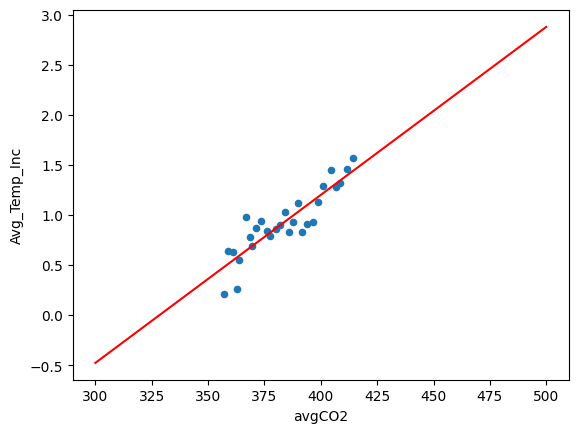

In [26]:
# merging co2 and temperature change datasets to conduct linear regression
co2_temp_df = pd.merge(temp_yr_df, mean_co2_by_year, on='Year')
co2_temp_train = co2_temp_df.loc[:2012].copy()

X_train = co2_temp_train[["avgCO2"]]
y_train = co2_temp_train["Avg_Temp_Inc"]

model = LinearRegression()
model.fit(X = X_train, y = y_train)

c = model.coef_
b = model.intercept_

x = np.linspace(300, 500, num=100)
y = [((c * x_i) + b) for x_i in x]

co2_temp_train.plot.scatter(x="avgCO2", y="Avg_Temp_Inc")
plt.plot(x, y, c='r')

#calculating the pearson correlation coefficient
pearson_coefficient, _ = pearsonr(co2_temp_train["avgCO2"], co2_temp_train["Avg_Temp_Inc"])
print("Pearson correlation coefficient:", pearson_coefficient)

CO2 concentration and temperature increase share a positive correlation. The correlation is strong as the Pearson coefficient is 0.88, which is very high. Thus CO2 has a great impact on the rise on temperature.

Pearson correlation coefficient: 0.9804245688515786


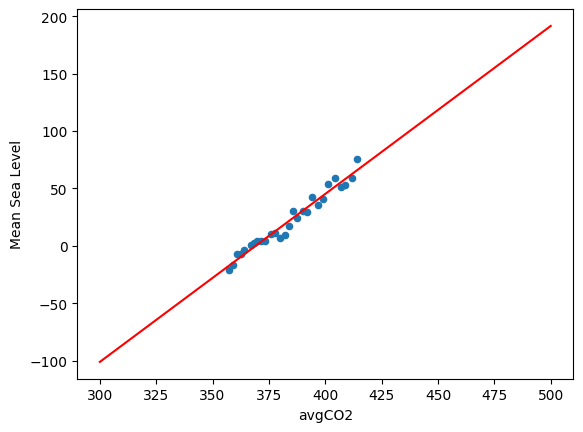

In [27]:
# merging co2 and temperature change datasets to conduct linear regression
co2_sea_df = pd.merge(sea_df, mean_co2_by_year, on='Year')
co2_sea_train = co2_sea_df.loc[:2012].copy()

X_train = co2_sea_train[["avgCO2"]]
y_train = co2_sea_train["Mean Sea Level"]

model = LinearRegression()
model.fit(X = X_train, y = y_train)

c = model.coef_
b = model.intercept_

x = np.linspace(300, 500, num=100)
y = [((c * x_i) + b) for x_i in x]

co2_sea_train.plot.scatter(x="avgCO2", y="Mean Sea Level")
plt.plot(x, y, c='r')

#calculating the pearson correlation coefficient
pearson_coefficient, _ = pearsonr(co2_sea_train["avgCO2"], co2_sea_train["Mean Sea Level"])
print("Pearson correlation coefficient:", pearson_coefficient)

CO2 concentration and the mean sea level share a positive correlation. The correlation is strong as the Pearson coefficient is 0.98, which is very high. Thus CO2 has a great impact on the overall sea level. We've seen in the EDA that the mean sea level is rising.

Pearson correlation coefficient: 0.5508337038634672


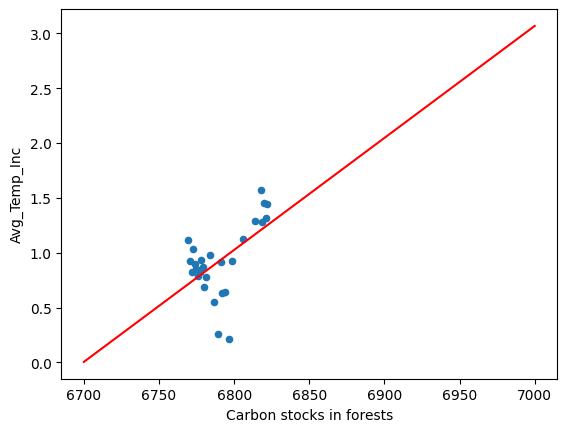

In [28]:
# merging co2 and temperature change datasets to conduct linear regression
forest_temp_df = pd.merge(temp_yr_df, forest_df, on='Year')
forest_temp_train = forest_temp_df.loc[:2012].copy()

X_train = forest_temp_train[["Carbon stocks in forests"]]
y_train = forest_temp_train["Avg_Temp_Inc"]

model = LinearRegression()
model.fit(X = X_train, y = y_train)

c = model.coef_
b = model.intercept_

x = np.linspace(6700, 7000, num=100)
y = [((c * x_i) + b) for x_i in x]

forest_temp_train.plot.scatter(x="Carbon stocks in forests", y="Avg_Temp_Inc")
plt.plot(x, y, c='r')

pearson_coefficient, _ = pearsonr(forest_temp_train["Carbon stocks in forests"], forest_temp_train["Avg_Temp_Inc"])
print("Pearson correlation coefficient:", pearson_coefficient)

Carbon stocks in forests signifies the amount of carbon that has been taken from the atmosphere and is now stored in the forest ecosystem. The two variables share a positive correlation. The correlation is neither strong nor as the Pearson coefficient is 0.55. Thus we cannot say that carbon stocks have a great impact on temperature increases. 

Pearson correlation coefficient: 0.6260050505356604


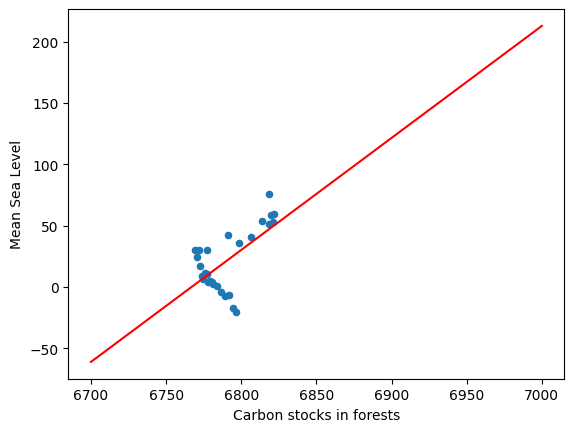

In [29]:
# merging co2 and temperature change datasets to conduct linear regression
forest_sea_df = pd.merge(sea_df, forest_df, on='Year')
forest_sea_train = forest_sea_df.loc[:2012].copy()

X_train = forest_sea_train[["Carbon stocks in forests"]]
y_train = forest_sea_train["Mean Sea Level"]

model = LinearRegression()
model.fit(X = X_train, y = y_train)

c = model.coef_
b = model.intercept_

x = np.linspace(6700, 7000, num=100)
y = [((c * x_i) + b) for x_i in x]

forest_sea_train.plot.scatter(x="Carbon stocks in forests", y="Mean Sea Level")
plt.plot(x, y, c='r')

#calculating the pearson correlation coefficient
pearson_coefficient, _ = pearsonr(forest_sea_train["Carbon stocks in forests"], forest_sea_train["Mean Sea Level"])
print("Pearson correlation coefficient:", pearson_coefficient)

Carbon stocks in forests and sea levels share a positive correlation. The correlation is very slightly strong as the Pearson coefficient is 0.63. However, we cannot say that carbon stocks have a great impact on temperature increases. There’s a possibility that there are other factors that influence climate change to such a degree that the effect carbon stocks have is diminished. But with the resources currently at hand, we can’t tell. 

<h2>Analysis: Confusion Matrix for KNN<h2>

To analyze the performance of the KNN model, we will construct a construction matrix based off of the MSE.

In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns

In [31]:
temp_country = pd.read_csv('Annual_Surface_Temperature_Change.csv')
temp_country.set_index('Country', inplace=True)
years = [f'F{year}' for year in range(1961, 2021)]
temp_country = temp_country.dropna(subset=years)
temp_country = temp_country[years]
temp_country.reset_index(inplace=True)

In [32]:
years = ['F2015', 'F2009', 'F2000', 'F2008', 'F2017']

country = 'United States'
country_record = temp_country[temp_country['Country'] == country]
us_true = country_record[years].values.flatten()

country = 'Spain'
country_record = temp_country[temp_country['Country'] == country]
spain_true = country_record[years].values.flatten()

country = 'Korea, Rep. of'
country_record = temp_country[temp_country['Country'] == country]
korea_true = country_record[years].values.flatten()

true = np.concatenate([us_true, spain_true, korea_true]) # true values for temperature changes
predictions = np.concatenate([us_predictions, spain_predictions, korea_predictions])

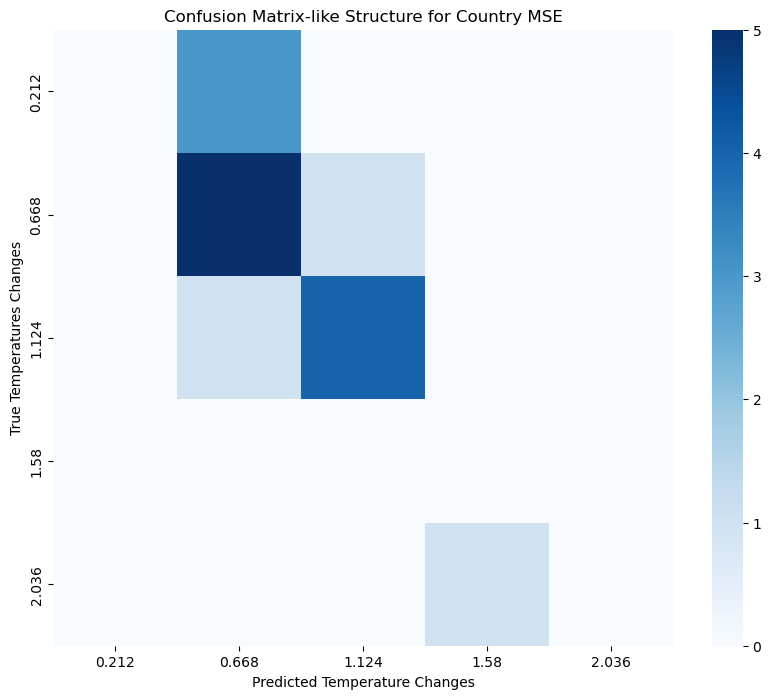

In [50]:
# Define bins for categorization (you can adjust the bin edges as needed)
bins = np.linspace(min(true.min(), predictions.min()), max(true.max(), predictions.max()), num=5)
true_binned = np.digitize(true, bins)
predictions_binned = np.digitize(predictions, bins)

conf_matrix = np.zeros((len(bins), len(bins)))
for true_val, pred_val in zip(true_binned, predictions_binned):
    conf_matrix[true_val-1, pred_val-1] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=False, fmt='g', cmap='Blues', cbar=True,
            xticklabels=bins, yticklabels=bins)
plt.xlabel('Predicted Temperature Changes')
plt.ylabel('True Temperatures Changes')
plt.title('Confusion Matrix-like Structure for Country MSE')
plt.show()

**Explanation**: The darker blues signify a higher count for predictions. We’ve set up bins spanning from the lowest to highest values for both the true values and predictions. We see that many predictions were accurate as there are two dark blue squares with the same true and predicted temperature change value. The light blue means a lower count for predictions, and although there are three light blue cells, we can’t negate the fact that the KNN model was efficient.

**Conclusion**: In conclusion, all datasets except for carbon stocks in forests indicated a rise with respect to climate change. We observed that surface temperature trends, disaster rates, and forest carbon stocks are correlated, as demonstrated by our ability to predict surface temperature using disaster rates and carbon stocks in the KNN model. The confusion matrix confirms that the KNN model was fairly successful. The results from the K-Means model were more surprising, as we expected to see more clusters with countries that are geographically closer to each other. This unexpected outcome might be due to other factors such as land mass and geography. Additionally, CO2 concentration in the atmosphere is more strongly correlated with climate change than carbon stocks in forests.